In [1]:
#importando bibliotecas

import pandas as pd

# Pandas possui duas estruturas de dados principais: Series e DataFrame
# Series: é uma matriz unidimensional rotulada capaz de armazenar qualquer tipo de dados (inteiros, strings, números de ponto flutuante, objetos Python, etc.).
# DataFrame: é uma estrutura de dados multidimensional rotulada capaz de armazenar dados de tipo heterogêneo (dados tabulares em formato de planilha, SQL, etc.).

### Default Dataframe

In [2]:
df = pd.read_csv('https://pycourse.s3.amazonaws.com/temperature.csv')

In [3]:
df.head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
1,2020-02-01,31.2,muito quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente
4,2020-05-01,24.0,confortavel


In [4]:
df.dtypes

date               object
temperatura       float64
classification     object
dtype: object

In [5]:
# Convertendo a coluna date para o tipo datetime

df['date'] = pd.to_datetime(df['date'])

In [6]:
# Descrição do dataset

df.describe()


,temperatura
count,6.000000
mean,26.800000
std,4.075782
min,20.000000
25%,25.000000
50%,28.250000
75%,28.950000
max,31.200000


In [7]:
df.iloc[0, 1] # iloc: index location - localização pelo índice

29.1

In [8]:
df.loc[0, 'classification'] # loc: location - localização pelo nome da coluna

'quente'

In [9]:
# Indexação booleana

df[df['classification'] == 'quente'].head()

,date,temperatura,classification
0,2020-01-01,29.1,quente
2,2020-03-01,28.5,quente
3,2020-04-01,28.0,quente


In [10]:
# Outra forma de fazer a indexação booleana

df.loc[df['classification'] == 'quente', 'temperatura']


0    29.1
2    28.5
3    28.0
Name: temperatura, dtype: float64

In [11]:
# Alterando o índice do dataframe

df = df.set_index('date')


df

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente
2020-03-01,28.5,quente
2020-04-01,28.0,quente
2020-05-01,24.0,confortavel
2020-06-01,20.0,frio


In [12]:
# Indexação booleana

condicao = df["temperatura"] > 30
condicao

date
2020-01-01    False
2020-02-01     True
2020-03-01    False
2020-04-01    False
2020-05-01    False
2020-06-01    False
Name: temperatura, dtype: bool

In [13]:
#aplicando a condição no dataframe 
df[condicao]

,temperatura,classification
date,,
2020-02-01,31.2,muito quente


In [14]:
# restrição de data

restricaoData = df.index < '2020-03-01'
df[restricaoData]

,temperatura,classification
date,,
2020-01-01,29.1,quente
2020-02-01,31.2,muito quente


In [15]:
# restrição de data e temperatura usabitlizando o operador & e loc

restricaoData = df.index < '2020-03-01'
restrito = df.loc[restricaoData & (df['temperatura'] > 30)]
restrito

,temperatura,classification
date,,
2020-02-01,31.2,muito quente


In [16]:
# Ordenando o dataframe 

print(df.sort_values(by='temperatura', ascending=False)) # ordenando de forma decrescente tomando como base a coluna temperatura


            temperatura classification
date                                  
2020-02-01         31.2   muito quente
2020-01-01         29.1         quente
2020-03-01         28.5         quente
2020-04-01         28.0         quente
2020-05-01         24.0    confortavel
2020-06-01         20.0           frio


In [17]:
# caso queira ordenar por mais de uma coluna, basta passar uma lista com as colunas desejadas

print(df.sort_values(by=['classification', 'temperatura'], ascending=False)) # ordenando de forma decrescente tomando como base a coluna temperatura

            temperatura classification
date                                  
2020-01-01         29.1         quente
2020-03-01         28.5         quente
2020-04-01         28.0         quente
2020-02-01         31.2   muito quente
2020-06-01         20.0           frio
2020-05-01         24.0    confortavel


In [18]:
# Nossa coluna Index é do tipo datetime
# Se ordenarmos pelo index, ele irá ordenar de forma crescente uma linha do tempo

print(df.sort_index(ascending=False))

            temperatura classification
date                                  
2020-06-01         20.0           frio
2020-05-01         24.0    confortavel
2020-04-01         28.0         quente
2020-03-01         28.5         quente
2020-02-01         31.2   muito quente
2020-01-01         29.1         quente


### Visualização


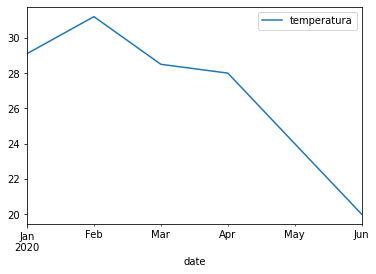

In [20]:
# Eixo x = Index(Datas)
# Eixo y = Temperatura

df.plot();

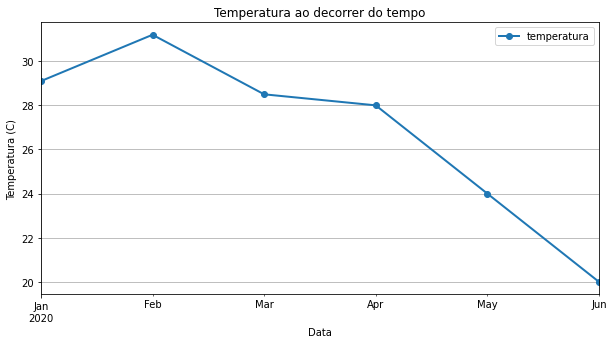

In [22]:
# Setando plot

# parametros da função plot: Tipo de gráfico, tamanho, grid, estilo da linha, título, label do eixo y, label do eixo x, espessura da linha, cor da linha
# referencia: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html


#Dados Númericos
df.plot(figsize=(10,5),grid=True, style='-o', title='Temperatura ao decorrer do tempo', ylabel='Temperatura (C)', xlabel='Data',linewidth=2,color = 'red');

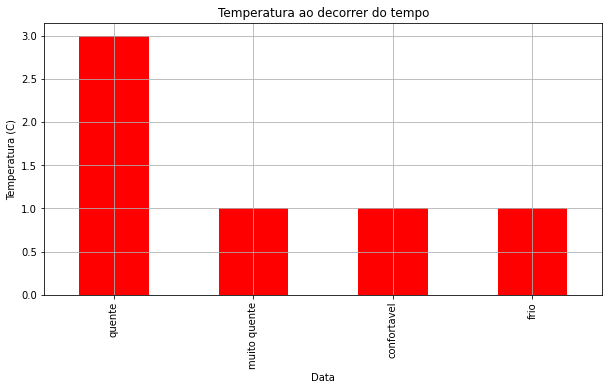

In [23]:
# Dados Categóricos

# Usar método values_counts() para contar a quantidade de cada classificação, e depois plotar o gráfico de barras

#kind = tipo de gráfico

df["classification"].value_counts().plot(kind='bar',figsize=(10,5),grid=True, style='-o', title='Temperatura ao decorrer do tempo', ylabel='Temperatura (C)', xlabel='Data',linewidth=2,color = 'red');

### Extra skills

In [26]:
# Groupby = funciona agrupando os dados de acordo com o que foi passado como parâmetro

df.groupby('classification').mean()

# Aplicou o metodo mean() para cada grupo da label temperatura

,temperatura
classification,
confortavel,24.000000
frio,20.000000
muito quente,31.200000
quente,28.533333


In [28]:
# Delentando a coluna temperatura

df.drop('temperatura', axis=1)

# Uma forma de alterar o dataframe é passando o parametro inplace=True, não precisando atribuir com o operador =

# Lembrar ao fazer df = dfModificado, a cada operação que for feita no dfModificado, será feita no df, pois são o mesmo objeto
# caso queira copiar usar o metodo copy()

,classification
date,
2020-01-01,quente
2020-02-01,muito quente
2020-03-01,quente
2020-04-01,quente
2020-05-01,confortavel
2020-06-01,frio


### Test Dataframes

In [2]:
# Importando os dados
League = pd.read_csv('Brasileirao_Matches.csv')
cup = pd.read_csv('Brazilian_Cup_Matches.csv')
Continental = pd.read_csv('Libertadores_Matches.csv')



In [5]:
League.head()

,datetime,home_team,home_team_state,away_team,away_team_state,home_goal,away_goal,season,round
0,2012-05-19 18:30:00,Palmeiras-SP,SP,Portuguesa-SP,SP,1.0,1.0,2012,1
1,2012-05-19 18:30:00,Sport-PE,PE,Flamengo-RJ,RJ,1.0,1.0,2012,1
2,2012-05-19 21:00:00,Figueirense-SC,SC,Nautico-PE,PE,2.0,1.0,2012,1
3,2012-05-20 16:00:00,Ponte Preta-SP,SP,Atletico-MG,MG,0.0,1.0,2012,1
4,2012-05-20 16:00:00,Corinthians-SP,SP,Fluminense-RJ,RJ,0.0,1.0,2012,1


In [6]:
cup.head()

,round,datetime,home_team,away_team,home_goal,away_goal,season
0,1,2012-03-07 16:00:00,Boavista Sport Club (antigo Esporte Clube Barr...,América - MG,0.0,0.0,2012
1,1,2012-03-14 20:30:00,América - MG,Boavista Sport Club (antigo Esporte Clube Barr...,2.0,1.0,2012
2,1,2012-03-07 19:30:00,Gama - DF,Ceará - CE,0.0,2.0,2012
3,1,2012-03-07 20:30:00,Aquidauanense Futebol Clube - MS,Bahia de Feira - BA,1.0,0.0,2012
4,1,2012-03-14 20:30:00,Bahia de Feira - BA,Aquidauanense Futebol Clube - MS,2.0,0.0,2012


In [7]:
Continental.head()

,datetime,home_team,away_team,home_goal,away_goal,season,stage
0,2013-02-12 20:15:00,Nacional (URU),Barcelona-EQU,2,2,2013.0,group stage
1,2013-02-13 22:00:00,Boca Juniors,Toluca,1,2,2013.0,group stage
2,2013-02-19 23:45:00,Toluca,Nacional (URU),2,3,2013.0,group stage
3,2013-02-27 19:45:00,Barcelona-EQU,Boca Juniors,1,2,2013.0,group stage
4,2013-03-07 00:15:00,Toluca,Barcelona-EQU,1,1,2013.0,group stage
